In [ ]:
#This notebook is to make growth curves from selected data output from the Biotek using python's Seaborn and Altair packages
#Seaborn and Altair are packages that allow you to make nice figures
#This code only works for excel files with well definitions in row 1, and time column A


# remove hashes in front of pip code and use it to install altair, 
# if you dont have other packages change 'altair' to the package you wish to install
#the final cell in this notebook makes a chart using Altair. Altair makes them pretty nicely
#Altair also appears to be faster than seaborn
#if altair doesnt install with the above command, there is also seaborn code (baked into anaconda) to make your figure

In [ ]:
#import pip
#pip.main(['install', 'altair']) 

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
%pylab inline
import seaborn as sns
import pandas as pd
import math as mt
import altair as alt

Populating the interactive namespace from numpy and matplotlib


In [3]:
dfOD=0
excel='dbtl5.xlsx'
dfOD=pd.read_excel(excel,sheet_name='od')
dfRP=pd.read_excel(excel, sheet_name='ph') 
dfRP3=pd.read_excel(excel, sheet_name='do')
#dfRP will only be used to load in RFP signal into dfOD2

dic=pd.read_excel(excel, sheet_name='dic')
#this is a dataframe that will be employed to name wells based on their condition
columns = dfOD.columns.to_list()
columns=columns[1:]

dfOD2 = dfOD.melt(id_vars='Time', value_vars=columns)
dfRP2 = dfRP.melt(id_vars='Time', value_vars=columns)
dfRP4 = dfRP3.melt(id_vars='Time',value_vars=columns)
#this 'melts' the dataframe into a long format

dfOD2=dfOD2.rename(columns={'value':'OD600','variable':'well'})
#this renames the columns created by the 'melt' function to more informative labels

dfOD2['condition'] = dfOD2.well.values 
#create a new column with values that you can manipulate with dictionary

dfOD2=dfOD2.replace({'condition':dict(zip(dic.Well1,dic.Condition))}) 
dfOD2=dfOD2.replace({'condition':dict(zip(dic.Well2,dic.Condition))})
dfOD2=dfOD2.replace({'condition':dict(zip(dic.Well3,dic.Condition))})
#dfOD2=dfOD2.replace({'condition':dict(zip(dic.Well4,dic.Condition))})
#replace funtion renames wells based on the dictionary you made in the excel file
#the dict(zip()) function is probably one of the most useful ive come across

#altair cant have more than 5 lines per line chart. 
#we can make more and overlay them, that is what the conditions and various "dfOD"s are for
dfOD2['pH']=dfRP2.value.values
dfOD2['DO']=dfRP4.value.values
#loads a column named RFP from dfRP2 onto dfOD2 so you only need to work with one dataframe
dfOD1=dfOD2
#dfOD2['normRFP']=dfOD2.RFP/dfOD2.OD600
#normalize RFP by OD
condition1 = ("A1C1","A2C2","A3C3")
condition2 = ("A4C4","A8C8","D4F4")            
condition3 = ("A6C6","A7C7")#A5C5)
condition4 = ("D1F1","D2F2","D3F3")
condition5=("D5F5",'D6F6','D7F7','MOPS')

dfOD0=dfOD1[dfOD1.condition.isin((condition1))]
dfOD2=dfOD1[dfOD1.condition.isin((condition2))]
dfOD3=dfOD1[dfOD1.condition.isin((condition3))]
dfOD4=dfOD1[dfOD1.condition.isin((condition4))]
dfOD5=dfOD1[dfOD1.condition.isin((condition5))]
#this selects the data you defined in the condition2 variable
dfOD5
#this should be a dataframe with columns named Time, well, OD600, condition, RFP, and normRFP

,Time,well,OD600,condition,pH,DO
7084,0.0039,D5,5.55,D5F5,6.36,97.13
7085,0.1939,D5,5.52,D5F5,6.36,98.88
7086,0.3831,D5,5.55,D5F5,6.36,100.85
7087,0.5722,D5,5.52,D5F5,6.35,100.58
7088,0.7617,D5,5.52,D5F5,6.35,101.16
...,...,...,...,...,...,...
12139,47.0233,F8,13.28,MOPS,5.23,103.46
12140,47.2128,F8,13.31,MOPS,5.24,103.75
12141,47.4031,F8,13.34,MOPS,5.24,103.91
12142,47.5928,F8,13.27,MOPS,5.24,103.92


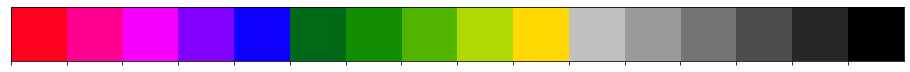

In [4]:
from colour import Color
classlen=len(set(dfOD1.condition.values))
grey = Color('#c2c0c0')
red = Color('#ff001e')
green = Color('#006918')
colg=math.trunc(classlen/3)
colb=classlen-2*colg


colors = list(grey.range_to(Color('#000000'),colb))
colorsc =list(green.range_to(Color('#ffd900'),colg)) #toggle these based on classlen
colorsb= list(red.range_to(Color("#0d00ff"),colg))
             
colors = [str(i) for i in colors]
colorsb= [str(i) for i in colorsb]
colorsc=[str(i) for i in colorsc]
             
stroke_palette = colorsb +colorsc+ colors 
sns.palplot(stroke_palette)

In [8]:
def lector(df,y ,ytitle, y_max,y_min ):
    line = alt.Chart(df).mark_line(opacity=1).encode(
         x=alt.X('Time',axis=alt.Axis(labels=True),title=None,scale=alt.Scale(domain=(0, 48))
                ),
         y=alt.Y(y,axis=alt.Axis(labels=True),title=ytitle,
                 scale=alt.Scale(domain=(y_min,y_max))
                ),
         color=alt.Color('condition', legend=alt.Legend(columns=1,symbolLimit=0,orient='left'), 
         scale=alt.Scale(range=stroke_palette)))
    error= alt.Chart(df).mark_errorband(extent='ci').encode(
         x=alt.X('Time',axis=alt.Axis(labels=True),title=None,scale=alt.Scale(domain=(0, 48))
                ),
         y=alt.Y(y,axis=alt.Axis(labels=True),title=ytitle,
                 scale=alt.Scale(domain=(y_min,y_max))
                ),
         color=alt.Color('condition', legend=alt.Legend(columns=1,symbolLimit=0,orient='left'), 
         scale=alt.Scale(range=stroke_palette)))
    chart = line + error
    return chart
def lectorfig(y,ytitle,y_max,y_min):   
    line = lector(df=dfOD0,y=y,ytitle=ytitle,y_max=y_max,y_min=y_min)
    line2 = lector(df=dfOD2,y=y,ytitle=ytitle,y_max=y_max,y_min=y_min)
    line3 = lector(df=dfOD3,y=y,ytitle=ytitle,y_max=y_max,y_min=y_min)
    line4 = lector(df=dfOD4,y=y,ytitle=ytitle,y_max=y_max,y_min=y_min)
    line5 = lector(df=dfOD5,y=y,ytitle=ytitle,y_max=y_max,y_min=y_min)
    chart=line+line2+line3+line4+line5
    #.resolve_scale(y='independent')
    return chart

In [9]:
od=lectorfig('mean(OD600)',"\u03BB620 Backscatter (a.u.)",20,0)
ph=lectorfig('mean(pH)',"pH",8,0)
DO=lectorfig('mean(DO)',"DO",120,-20)
chart2=od|ph|DO
chart2=chart2.configure_axis(
        labelFontSize=20,
        titleFontSize=20
    ).configure_legend(
        labelFontSize=20,
        titleFontSize=20,
        symbolSize=150)
chart2#.save('ARTDBTL4-0.html')

alt.HConcatChart(...)